# Model 2: Does Popularity Causes Popularity?
# A Prediction Modelling Approach to the time-dependency on Video Popularity

## 1. Introduction

In the previous model, we have examines how different category of videos have various viewer statistics. It is a static model that does not take into account the change through time, so what about time? Does a video with high initial view tend to attract more viewers and be more successful, or does the increased view count has little dependence on previous view count? Is there an effect similar to "The Big gets Bigger" on Youtube? If there is such a relationship, will they be linear, or will they have some more exciting and intricate characteristics? 

Since we want to predict which video is going to be popular by looking at their initial performance, we first try to visualize the effect of time on a single video; if time causes a linear increase on every statistics of a video, this may suggest that the initial and final statistics for every video also have a linear relation (if the slope for the increase is similiar among videos). After examining the trend on a single video, we will develop the main model with the purpose of predicting the increase of popularity for any given video based on its initial popularity, or its statistics like likes, dislikes, viewcounts, etc. in particular.

The dataset we are using is the following:Youtube Videos ViewCount every hour (Link: https://www.kaggle.com/nnqkfdjq/statistics-observation-of-random-youtube-video#count_observation_upload.csv)

In [1]:
# import necessary packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import random
import numpy as np

## 2. Data Cleaning and Preparation
In this step, we get rid of some ofthe unnecessary columns in the original dataset and also split out the first sub-dataset used in the process of determining the role of time on a given video's view statistics.

In [2]:
data = pd.read_csv('count_observation_upload.csv')
df=data.drop(['commentCount_diff','dislikeCount_diff','favoriteCount_diff','likeCount_diff',
              'viewCount_diff','favoriteCount'],axis=1)
#drop favorite count since this data lacks these info(all 0 in the dataset)
#drop other columns since we do not need these info for building our models.
df1=df.loc[df['videoId']=="FzG4uDgje3M"] # Seperate out the data for a specific video through time
df1=df1.dropna()#drop the NaN entries
df1.head()

,Unnamed: 0,index,videoId,commentCount,dislikeCount,likeCount,viewCount,Time
0,0,0,FzG4uDgje3M,131330.0,411967.0,1993172.0,281321552.0,2018-05-07 18:00:00
1,1,1,FzG4uDgje3M,131410.0,412203.0,1994314.0,281468577.0,2018-05-07 19:00:00
2,2,2,FzG4uDgje3M,131562.0,412511.0,1995697.0,281915631.0,2018-05-07 20:00:00
3,3,3,FzG4uDgje3M,131690.0,412836.0,1997352.0,282044028.0,2018-05-07 21:00:00
4,4,4,FzG4uDgje3M,131857.0,413237.0,1999256.0,282380859.0,2018-05-07 22:00:00


Now, to give some insight on what the viewcount change is like for a single video, several graphs are made:

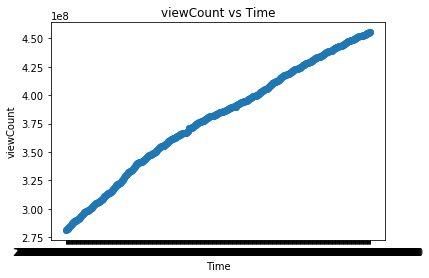

In [3]:
plt.scatter(df1['Time'],df1['viewCount'])
plt.title('viewCount vs Time')
plt.xlabel('Time')
plt.ylabel('viewCount')
plt.show()#we can see the viewcount and time forms a linear relationship.

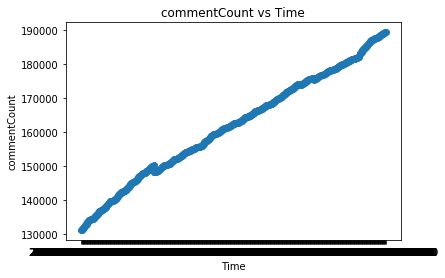

In [4]:
plt.scatter(df1['Time'],df1['commentCount'])
plt.title('commentCount vs Time')
plt.xlabel('Time')
plt.ylabel('commentCount')
plt.show()

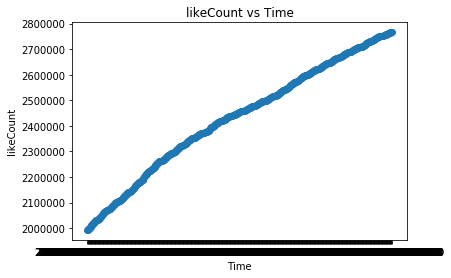

In [5]:
plt.scatter(df1['Time'],df1['likeCount'])
plt.title('likeCount vs Time')
plt.xlabel('Time')
plt.ylabel('likeCount')
plt.show()

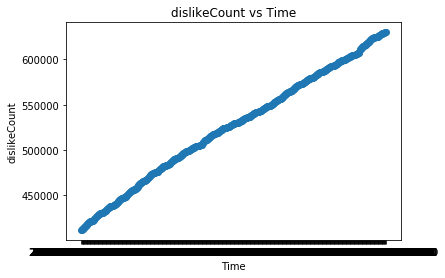

In [6]:
plt.scatter(df1['Time'],df1['dislikeCount'])
plt.title('dislikeCount vs Time')
plt.xlabel('Time')
plt.ylabel('dislikeCount')
plt.show()

## 3. Modelling the effect of time on a single video
Judging by the shape of the curve above, we conclude that all statistics have a linear relationship against time. To test our hypothesis, one linear regression model is made for each relationship with standard train-test split and cross-validation.


We train a linearRegression model to model the linear relation between viewCount and Time. Also, since the time in the dataset are strings and cannot be used to train our model, we could let the initial record time be 0, and since we have data recorded every hour, the index column can be traeted as the "time" variable.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(df1[['viewCount']], df1[['index']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9879031316328957

We get a pretty high score, which indecates our linear model of viewcount and time is pretty accurate. Thus, we could have the conclusion that if the initial viewcount is high, the final viewcount will also be high. We do the similar process for the rest counts and try to find teh relation between these counts and time.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df1[['commentCount']], df1[['index']],
                                                    test_size=0.2, random_state=42)
#we could let the first record time be 0, and since we have data recorded every hr, 
#the index of the rows could represent teh time elapsed since the start of record.
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9957487072681469

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df1[['likeCount']], df1[['index']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9870919411503317

In [10]:
x_train, x_test, y_train, y_test = train_test_split(df1[['dislikeCount']], df1[['index']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9971574888627115

These count and time all have linear relation, and these linear relations indicate that the initial commentcount, viewcount, likecount, dislikecount, and their corresponding final values also have linear relations. Initially we thought that linear models can be used to predict the possible final data from the initial statistics, but we soon found out that this model would not yield a descriptive result.

## 4. Main Model: Modelling the relationship between video's growth over a given time period and its initial performance

Initially, we decided to predict the final statistics from the initial statistics, but we noticed a possible cause for unacceptable error in this kind of model: the direct effect of initial counts on final counts. Since the initial counts for most videos are very big compare to the increase in this time peroid, <strong><em>the initial values could have too big an influence on the final values</strong></em> and therefore <strong><em>could significantly affect the modelling of relation and the accesment of accuracy  for the model</strong></em>. (In fact we have done some models this way, and every linear model shows a really low slope and really high score (>0.99) since the difference in increase is just too small compare to the huge initial value)To address this, we plot graphs and construct models of the initial counts and the <strong><em>difference</strong></em> between the final counts and the initial counts. i.e., we plot graphs and build models of the initial counts and the value of (final_count - initial_count) to elimiate the "fakely accurate" models that could be caused by the big initial value.

### 4.1 Further data preparation and visualization

We can see that we do have some null values in df3 and we need to fill them with mean value. 
We could choose mean because the dataset is relatively big, thus teh mean value could be a good representation of the possible NaN values. Then we change the value of counts in df3 to the difference betweeen the final counts and the initial counts to eliminate the influence of the initial values on the accuracy.

In [11]:
df2=df.loc[df['Time']=='2018-05-07 18:00:00']  #Initial Performance
df3=df.loc[df['Time']=='2018-06-05 16:00:00']  #Final Performance
print(pd.isnull(df2).sum() > 0)
print(pd.isnull(df3).sum() > 0)

df3['commentCount']=df3['commentCount'].fillna(df3['commentCount'].mean())
df3['dislikeCount']=df3['dislikeCount'].fillna(df3['dislikeCount'].mean())
df3['likeCount']=df3['likeCount'].fillna(df3['likeCount'].mean())
df3['viewCount']=df3['viewCount'].fillna(df3['viewCount'].mean())

#difference between initial count and final count
df3['commentCount']=df3['commentCount'].values-df2['commentCount'].values
df3['dislikeCount']=df3['dislikeCount'].values-df2['dislikeCount'].values
df3['likeCount']=df3['likeCount'].values-df2['likeCount'].values
df3['viewCount']=df3['viewCount'].values-df2['viewCount'].values
print(pd.isnull(df3).sum() > 0) #filled all teh NaN values successfully.

Unnamed: 0      False
index           False
videoId         False
commentCount    False
dislikeCount    False
likeCount       False
viewCount       False
Time            False
dtype: bool
Unnamed: 0      False
index           False
videoId         False
commentCount     True
dislikeCount     True
likeCount        True
viewCount        True
Time            False
dtype: bool


C:\Users\19665\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\19665\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\19665\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

Unnamed: 0      False
index           False
videoId         False
commentCount    False
dislikeCount    False
likeCount       False
viewCount       False
Time            False
dtype: bool


C:\Users\19665\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\19665\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\19665\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

In [12]:
df2.head()

,Unnamed: 0,index,videoId,commentCount,dislikeCount,likeCount,viewCount,Time
0,0,0,FzG4uDgje3M,131330.0,411967.0,1993172.0,281321552.0,2018-05-07 18:00:00
695,695,0,LOYAomlRbxI,13009.0,33188.0,706006.0,80762575.0,2018-05-07 18:00:00
1390,1390,0,Bm8rz-llMhE,14108.0,22212.0,647831.0,56259050.0,2018-05-07 18:00:00
2085,2085,0,pd7AMDMotyM,31895.0,41267.0,688754.0,53295716.0,2018-05-07 18:00:00
2780,2780,0,4kDklB6-69Q,69616.0,20403.0,1048729.0,46531812.0,2018-05-07 18:00:00


In [13]:
df3.head()

,Unnamed: 0,index,videoId,commentCount,dislikeCount,likeCount,viewCount,Time
694,694,694,FzG4uDgje3M,57945.0,217845.0,773068.0,174162471.0,2018-06-05 16:00:00
1389,1389,694,LOYAomlRbxI,5347.0,11916.0,165504.0,46932826.0,2018-06-05 16:00:00
2084,2084,694,Bm8rz-llMhE,1184.0,4892.0,101808.0,16873368.0,2018-06-05 16:00:00
2779,2779,694,pd7AMDMotyM,1914.0,4709.0,71034.0,16417437.0,2018-06-05 16:00:00
3474,3474,694,4kDklB6-69Q,10867.0,7536.0,252170.0,27965915.0,2018-06-05 16:00:00


Now, we try to find the relationship between the initial performance and final performance of videos.
We expect this to be a linear relationship according to our pervious analysis, which means that videos on YouTube obey the "Big gets Bigger" effect. We first need to 
visualize their relationship to confirm our prediction.
Since these data for the ith entries in df2 and df3 are of the same video, we do not need to alter teh 
position of rows of df2 and df3 since they are alerady matched.

#### 4.1.1 Comment vs Comment increase

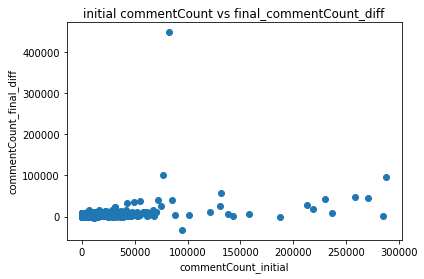

In [14]:
plt.scatter(df2['commentCount'],df3['commentCount'])
plt.title('initial commentCount vs final_commentCount_diff')
plt.xlabel('commentCount_initial')
plt.ylabel('commentCount_final_diff')
plt.show()

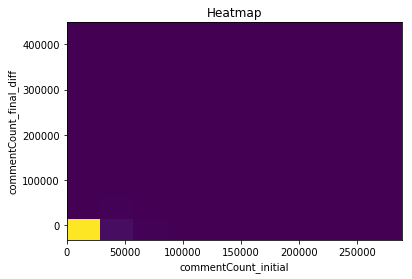

In [15]:
Z, hmx, hmy = np.histogram2d(df2['commentCount'],df3['commentCount'])

plt.title('Heatmap')
plt.xlabel('commentCount_initial')
plt.ylabel('commentCount_final_diff')
plt.pcolormesh(hmx,hmy,Z.T)

plt.show()

From the graph above, we conclude that our prediction of a linear relationship for commentCount is <strong><em>not</strong></em> correct and this error could be caused by the big initial value of the commentCount. We could see that the initial comment count does not quite influence the final commentCount since from the plots we can see that the commentCount difference is nearly the same for all initial comment values, and the density is also nearly the same for all different values. According to the scatter plot, we could try to use both linearRegression model and ploy model to predict their relation, but we may <strong><em>not</strong></em> get a high score since these two counts are not actually tightly correlated.

#### 4.1.2 Dislike vs Dislike increase

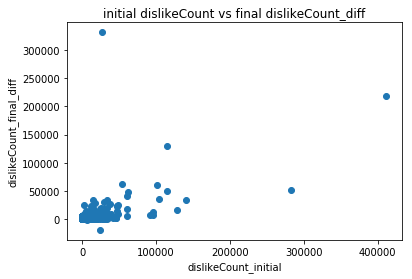

In [16]:
plt.scatter(df2['dislikeCount'],df3['dislikeCount'])
plt.title('initial dislikeCount vs final dislikeCount_diff')
plt.xlabel('dislikeCount_initial')
plt.ylabel('dislikeCount_final_diff')
plt.show()

From the graph above, we can see that our assumption of a linear relationship is somewhat accurate, as those who has high initial dislikes gets more dislikes.

#### 4.1.3 Like vs Like increase

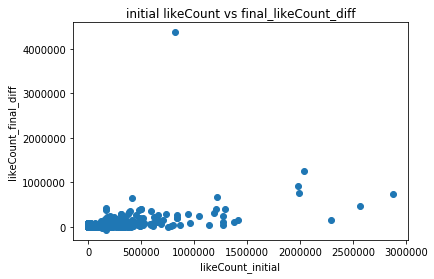

In [17]:
plt.scatter(df2['likeCount'],df3['likeCount'])
plt.title('initial likeCount vs final_likeCount_diff')
plt.xlabel('likeCount_initial')
plt.ylabel('likeCount_final_diff')
plt.show()

From the graph above, we can see that our assumption of a linear relationship is somewhat accurate, as those who has high initial likes gets more likes.

### 4.2 Building a Model for each relationship

#### 4.2.1(a) LinearRegression model: initial commentCount and commentCount increase

In [18]:
x_train, x_test, y_train, y_test = train_test_split(df2[['commentCount']], df3[['commentCount']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.19337335880250875

#### 4.2.1(b) poly model: initial commentCount and commentCount increase

In [19]:
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model.fit(x_train, y_train)
poly_model.score(x_test, y_test)

0.2013606105215069

Here, both model failed to provide a satisfactory result. As mentioned in the visualization part, we believe this result verifies our idea that comment increase is somewhat not dependent on the initial comments.

#### 4.2.2 (a) LinearRegression model: initial dislikeCount and dislikeCount increase¶

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df2[['dislikeCount']], df3[['dislikeCount']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5099655509613146

#### 4.2.2 (b) poly model: initial dislikeCount and dislikeCount increase

In [21]:
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model.fit(x_train, y_train)
poly_model.score(x_test, y_test)

0.39714707566088814

The higher modelling score for linear model verifies our idea that the initial dislikeCount and dislikeCount_diff between the initial dislikeCount and final dislikeCouunt is more a linear relation; in other words, if there are more people dislike a video at the beginning when the video is posted, then more likely there are more people dislike this video after time.

#### 4.2.3 (a) LinearRegression model: initial likeCount and likeCount increase

In [22]:
x_train, x_test, y_train, y_test = train_test_split(df2[['likeCount']], df3[['likeCount']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.5198182179104062

#### 4.2.3(b) poly model: initial likeCount and likeCount increase¶

In [23]:
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model.fit(x_train, y_train)
poly_model.score(x_test, y_test)

0.44440051723076035

We could see from the previous plot and analysis that the initial likeCount and likeCount_diff between the initial likeCount and final likeCouunt is more a linear relation; in other words, if there are more people like a video at the beginning when the video is posted, then more likely there are more people like this video after time. This ralation is similar to those found on the initial dislike and final_dislike_diff relation, which is reasonable.

#### 4.2.4(a) LinearRegression model: initial viewCount and viewCount increase

In [24]:
x_train, x_test, y_train, y_test = train_test_split(df2[['viewCount']], df3[['viewCount']],
                                                    test_size=0.2, random_state=42)
model = LinearRegression()
model = model.fit(x_train, y_train)
model.score(x_test, y_test)

0.764144432898527

#### 4.2.4(b) poly model: initial viewCount and viewCount increase

In [25]:
poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model.fit(x_train, y_train)
poly_model.score(x_test, y_test)

0.8844861772127124

From the plot and analysis above, we could see that the initial viewCount and the difference between the initial viewCount and final viewCount is more a ploynomial relation; this means that if there are more people view the video at the beginning when the video is posted, there are more likely to be much more people to view the video after time. It seems very reasonable for this to be a non-linear relationship since one people views the video usually means this video will be more popular, and viewers are more likely to click and watch an already-popular video. This kind of exponencial growth is a key characteristics of the "Big gets Bigger" effect, and it can be found in other places like competition between firms.

## 5. Interpretation of the result

Our result shows that the initial performance of a video is not necessary linearly correlated to its final performance. <br><br>
From the analysis above, we could see that the initial comment count does not influence the change of comment count after time and these two values are not tightly correlated. Therefore we could not say a video will get more comments because it gets many comments initially. <br><br>
For the like and dislike counts, these initial values seem to have a more linear relationship with the change of like/dislike counts overtime, which means that we could predict if a video has more like-count at the beginning, it is more likely to have proportionally more like/dislike after time.<br><br>
For the viewCounts, these initial values seem to have a more polynomial relation with the change of viewCounts overtime. Therefore, we could predict that if a video has more viewCounts initially, it is more likely to have a lot more viewCounts after time. In other words, if YouTubers wants to make their videos popular after time, it is better for them to try to attract as many people as they can to view their video at the very beginning when the video is released since this will significantly improve the final viewCounts.<br><br>
By implementing this model on real-life data, we could predict the final performance of YouTube videos by looking at their first performance. The insight this model provides is beneficial for YouTubers since they can gain prior information on whether or not their video will become viral and what to do to increase this chance by setting early-stage targets on certain kind of counts(views, likes, etc.). For example, our model can help predict the result for different advertising strategies (mass stream or specialized advertisement?) with different initial statistics boost(mass stream dramatically increase your view count, but may hurt you by adding dislikes) for YouTubers so that they can find the optimal strategy.